# qiskit-ibm-experiment

## What is it?

* A Python interface for communicating with IBM's experiment result db.
* Previously a part of `qiskit-ibmq-provider`.
* Now an independent package.
* A "sibling" of `qiskit-ibm-runtime` and `qiskit-ibm-provider`.
* Used inside `qiskit-experiments` but can be used on its own.

## Usage flow
* Connect via an API token ("legacy method")
* CRUD (Create, Read, Update, Delete) for *experiments*, *analysis results* and *plots*.
* Encapsulates the result db REST API.

## How to get
* `pip install qiskit-ibm-experiment` (available soon).

In [1]:
from qiskit_ibm_experiment import IBMExperimentService
from qiskit_experiments.framework.json import ExperimentDecoder, ExperimentEncoder
from IPython.display import SVG, display

# Initial setup

In [2]:
IBMExperimentService.save_account(token="MY_API_TOKEN")
IBMExperimentService.save_account(name="staging", token="MY_STAGING_API_TOKEN", url='https://api-dev.quantum-computing.ibm.com')

# Basic usage


In [3]:
service = IBMExperimentService()
service.experiments()

[{'experiment_type': 'readout_test',
  'backend': 'ibmq_mumbai',
  'experiment_id': 'c8ca7a54-b0f9-11ec-88d9-b02628f8108c',
  'parent_id': None,
  'tags': ['cal',
   '2022-03-31_09.52.16_cal_readout_angle_Q0Q1Q2Q3Q4Q5Q6Q7Q8Q9Q10+16'],
  'job_ids': [],
  'share_level': 'group',
  'metadata': {'fqdn': 'zelda.qnet.local',
   'path': 'cal/2022-03-31_09.52.16_cal_readout_angle_Q0Q1Q2Q3Q4Q5Q6Q7Q8Q9Q10+16/2022-03-31_09.52.20_readout_test_Q0Q1Q2Q3Q4Q5Q6Q7Q8Q9Q10+16',
   'qmap': 'Q0Q1Q2Q3Q4Q5Q6Q7Q8Q9Q10Q11Q12Q13Q14Q15Q16Q17Q18Q19Q20Q21Q22Q23Q24Q25Q26',
   'user': 'labuser',
   'hostname': 'zelda',
   'user-agent': 'ibmqc/2.16.0a'},
  'figure_names': ['M0.svg',
   'M1.svg',
   'M10.svg',
   'M11.svg',
   'M12.svg',
   'M13.svg',
   'M14.svg',
   'M15.svg',
   'M16.svg',
   'M17.svg',
   'M18.svg',
   'M19.svg',
   'M2.svg',
   'M20.svg',
   'M21.svg',
   'M22.svg',
   'M23.svg',
   'M24.svg',
   'M25.svg',
   'M26.svg',
   'M3.svg',
   'M4.svg',
   'M5.svg',
   'M6.svg',
   'M7.svg',
   'M8.svg'

In [4]:
exp_id = 'b4bebb95-66d4-461b-9287-1441443a3336'
service.experiment(exp_id)

{'experiment_type': 'FineXAmplitude',
 'backend': 'ibm_bangkok',
 'experiment_id': 'b4bebb95-66d4-461b-9287-1441443a3336',
 'parent_id': None,
 'tags': ['qiskit_monitoring', 'save_results_version_3'],
 'job_ids': [],
 'share_level': 'hub',
 'metadata': {'_source': {'class': 'qiskit_experiments.framework.experiment_data.ExperimentData',
   'qiskit_version': '0.34.2',
   'metadata_version': 1},
  'root_id': 'de3d33a2-5452-43f2-93ed-b04eb99cadcc',
  'num_qubits': 1,
  'job_metadata': [{'job_ids': ['624416b03745f036a32a6a97'],
    'run_options': {'meas_level': 2},
    'analysis_options': {'p0': {},
     'amp': 1,
     'axis': None,
     'plot': True,
     'xlim': None,
     'ylim': [0, 1],
     'extra': {},
     'style': {'__type__': 'object',
      '__value__': {'class': {'__type__': 'type',
        '__value__': {'name': 'PlotterStyle',
         'module': 'qiskit_experiments.curve_analysis.visualization.style',
         'version': '0.3.0.dev0+e2e6c1b'}},
       'version': '0.3.0.dev0+e2e6

# Experiment filtering

In [5]:
service.experiments(experiment_type='readout_test')

[{'experiment_type': 'readout_test',
  'backend': 'ibmq_mumbai',
  'experiment_id': 'c8ca7a54-b0f9-11ec-88d9-b02628f8108c',
  'parent_id': None,
  'tags': ['cal',
   '2022-03-31_09.52.16_cal_readout_angle_Q0Q1Q2Q3Q4Q5Q6Q7Q8Q9Q10+16'],
  'job_ids': [],
  'share_level': 'group',
  'metadata': {'fqdn': 'zelda.qnet.local',
   'path': 'cal/2022-03-31_09.52.16_cal_readout_angle_Q0Q1Q2Q3Q4Q5Q6Q7Q8Q9Q10+16/2022-03-31_09.52.20_readout_test_Q0Q1Q2Q3Q4Q5Q6Q7Q8Q9Q10+16',
   'qmap': 'Q0Q1Q2Q3Q4Q5Q6Q7Q8Q9Q10Q11Q12Q13Q14Q15Q16Q17Q18Q19Q20Q21Q22Q23Q24Q25Q26',
   'user': 'labuser',
   'hostname': 'zelda',
   'user-agent': 'ibmqc/2.16.0a'},
  'figure_names': ['M0.svg',
   'M1.svg',
   'M10.svg',
   'M11.svg',
   'M12.svg',
   'M13.svg',
   'M14.svg',
   'M15.svg',
   'M16.svg',
   'M17.svg',
   'M18.svg',
   'M19.svg',
   'M2.svg',
   'M20.svg',
   'M21.svg',
   'M22.svg',
   'M23.svg',
   'M24.svg',
   'M25.svg',
   'M26.svg',
   'M3.svg',
   'M4.svg',
   'M5.svg',
   'M6.svg',
   'M7.svg',
   'M8.svg'

# Analysis results and figures

In [6]:
service.analysis_results(experiment_id = exp_id)

[{'result_data': {'value': 0.0022254819165180646,
   '_chisq': 1.1897511882694298,
   '_extra': {'root_id': 'de3d33a2-5452-43f2-93ed-b04eb99cadcc'},
   '_value': {'__type__': 'object',
    '__value__': {'class': {'__type__': 'type',
      '__value__': {'name': 'Variable',
       'module': 'uncertainties.core',
       'version': '3.1.6'}},
     'version': '3.1.6',
     'settings': {'tag': None,
      'value': 0.0022254819165180646,
      'std_dev': 0.0007056581603769786}}},
   '_source': {'class': 'qiskit_experiments.database_service.db_analysis_result.DbAnalysisResultV1',
    'data_version': 1,
    'qiskit_version': '0.34.2'},
   'variance': 4.979534393066216e-07},
  'result_type': 'Xp_amp_d_theta',
  'device_components': ['Q12'],
  'experiment_id': 'b4bebb95-66d4-461b-9287-1441443a3336',
  'result_id': 'c8c9e728-a23b-4c1c-8326-df8f40cbe465',
  'quality': <ResultQuality.GOOD: 'GOOD'>,
  'verified': False,
  'tags': ['qiskit_monitoring', 'save_results_version_3'],
  'service': <qiskit_i

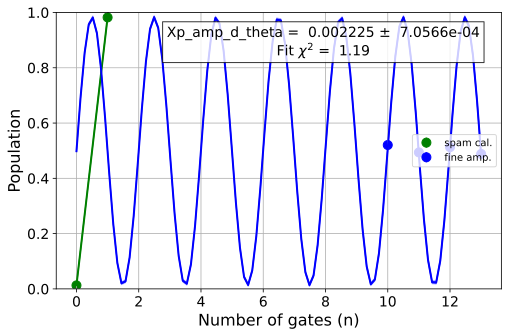

In [7]:
fig = service.figure(exp_id, 'figure_b4bebb95_2022-03-30T11:40:21.656059_0.svg')
display(SVG(fig))

# Creating a new experiment

In [8]:
service = IBMExperimentService(name="staging")
service.experiments()

[{'experiment_type': 'demo_day',
  'backend': 'backend1',
  'experiment_id': '738b6bc7-8a25-47da-a15c-afd2dde4d662',
  'parent_id': None,
  'tags': [],
  'job_ids': [],
  'share_level': 'private',
  'metadata': {'complex_number': {'__type__': 'complex', '__value__': [3, 2]}},
  'figure_names': ['figure_2022-03-31T16:51:56.250940.svg'],
  'notes': None,
  'hub': 'defaultHub',
  'group': 'defaultGroup',
  'project': 'defaultProject',
  'owner': '611bf2a18b4d277e11df152f',
  'creation_datetime': datetime.datetime(2022, 3, 31, 16, 51, 44, 899000, tzinfo=tzlocal()),
  'start_datetime': datetime.datetime(2022, 3, 31, 16, 51, 44, 896000, tzinfo=tzlocal()),
  'updated_datetime': datetime.datetime(2022, 3, 31, 16, 51, 57, 724000, tzinfo=tzlocal())},
 {'experiment_type': 'demo_day',
  'backend': 'backend2',
  'experiment_id': '2cb3d7f7-49a3-43b9-9484-6203620fea67',
  'parent_id': None,
  'tags': [],
  'job_ids': [],
  'share_level': 'private',
  'metadata': {'complex_number': {'__type__': 'compl

In [9]:
from qiskit.providers.ibmq import IBMQ, least_busy
provider = IBMQ.enable_account(url='https://api-dev.quantum-computing.ibm.com/v2', token="c0026ac13d5f10513555e5f396f20b60f97eabf85ba8591a3415ebcfb54e4961c8c095938a29ff4b657a725fa48e301d993ef509a7699ceddc891b0d1eddb137")
backend = least_busy(provider.backends(simulator=False, min_num_qubits=5))

In [10]:
exp_id = service.create_experiment(experiment_type="demo_day", 
                                   backend_name = backend.name(),
                                   provider=provider,
                                   metadata = {'complex_number': 3+2j},
                                   json_encoder=ExperimentEncoder
                                  )
exp_id

'26a1dbd8-a009-4938-a8c9-6211c727c441'

In [11]:
service.experiment(exp_id, json_decoder=ExperimentDecoder)

{'experiment_type': 'demo_day',
 'backend': 'backend1',
 'experiment_id': '26a1dbd8-a009-4938-a8c9-6211c727c441',
 'parent_id': None,
 'tags': [],
 'job_ids': [],
 'share_level': 'private',
 'metadata': {'complex_number': (3+2j)},
 'figure_names': [],
 'notes': None,
 'hub': 'defaultHub',
 'group': 'defaultGroup',
 'project': 'defaultProject',
 'owner': '611bf2a18b4d277e11df152f',
 'creation_datetime': datetime.datetime(2022, 3, 31, 16, 54, 56, 607000, tzinfo=tzlocal()),
 'start_datetime': datetime.datetime(2022, 3, 31, 16, 54, 56, 604000, tzinfo=tzlocal())}

In [12]:
for i in range(30):
    service.create_analysis_result(exp_id,
                                  result_data = {'100': 100-i, '010': 24+i},
                                  result_type = f'result{i}'
                                  )

In [13]:
service.analysis_results(experiment_id = exp_id)

[{'result_data': {'100': 71, '010': 53},
  'result_type': 'result29',
  'device_components': [],
  'experiment_id': '26a1dbd8-a009-4938-a8c9-6211c727c441',
  'result_id': 'f18d0e09-c3d4-49f1-bd20-a4068a99727e',
  'quality': <ResultQuality.UNKNOWN: 'UNKNOWN'>,
  'verified': False,
  'tags': [],
  'service': <qiskit_ibm_experiment.service.ibm_experiment_service.IBMExperimentService at 0x261b56490a0>,
  'backend_name': 'backend1',
  'creation_datetime': datetime.datetime(2022, 3, 31, 16, 55, 7, 234000, tzinfo=tzlocal())},
 {'result_data': {'100': 72, '010': 52},
  'result_type': 'result28',
  'device_components': [],
  'experiment_id': '26a1dbd8-a009-4938-a8c9-6211c727c441',
  'result_id': '1fd2d404-121f-41fb-ac3b-4bdc8b358310',
  'quality': <ResultQuality.UNKNOWN: 'UNKNOWN'>,
  'verified': False,
  'tags': [],
  'service': <qiskit_ibm_experiment.service.ibm_experiment_service.IBMExperimentService at 0x261b56490a0>,
  'backend_name': 'backend1',
  'creation_datetime': datetime.datetime(20

In [14]:
service.analysis_results(experiment_id = exp_id,
                        result_type = 'result1',
                        result_type_operator='like')

[{'result_data': {'100': 81, '010': 43},
  'result_type': 'result19',
  'device_components': [],
  'experiment_id': '26a1dbd8-a009-4938-a8c9-6211c727c441',
  'result_id': '7452ad44-4673-4619-a123-736c6eb91012',
  'quality': <ResultQuality.UNKNOWN: 'UNKNOWN'>,
  'verified': False,
  'tags': [],
  'service': <qiskit_ibm_experiment.service.ibm_experiment_service.IBMExperimentService at 0x261b56490a0>,
  'backend_name': 'backend1',
  'creation_datetime': datetime.datetime(2022, 3, 31, 16, 55, 4, 217000, tzinfo=tzlocal())},
 {'result_data': {'100': 82, '010': 42},
  'result_type': 'result18',
  'device_components': [],
  'experiment_id': '26a1dbd8-a009-4938-a8c9-6211c727c441',
  'result_id': '6b649232-f3a9-4235-8186-cb39d2182015',
  'quality': <ResultQuality.UNKNOWN: 'UNKNOWN'>,
  'verified': False,
  'tags': [],
  'service': <qiskit_ibm_experiment.service.ibm_experiment_service.IBMExperimentService at 0x261b56490a0>,
  'backend_name': 'backend1',
  'creation_datetime': datetime.datetime(20

In [15]:
fig_name, _ = service.create_figure(exp_id, fig)

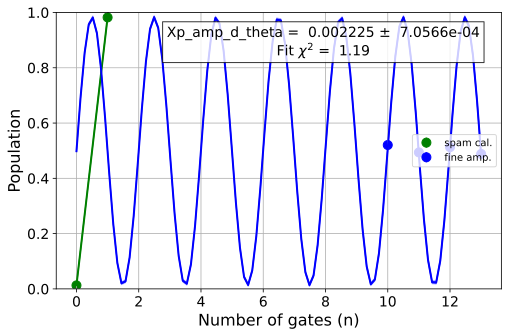

In [16]:
new_fig = service.figure(exp_id, fig_name)
display(SVG(new_fig))